In [1]:
# radon transform
# voting to choose the line in one cluster

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import cv2
from sklearn.cluster import DBSCAN
import math
from datetime import timedelta

from src import dasly

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    # start='20230901 103015',  # full 2 lines
    # start='20231005 082445',
    # start='20230901 163100',  # part of a line
    # start='20230901 183015',  # noise
    start='20230901 104015',  # 2 cars close to each other
    duration=60
)

Welcome to Dasly!
7 files, from 104014 to 104114


Heatmap with vmin -8.4e-06, vmax 8.4e-06


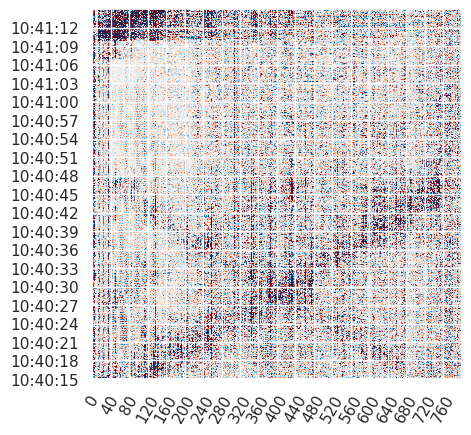

In [3]:
das.reset()
das.heatmap()

Downsampling factor: 4
New sampling rate: 250
Heatmap with vmin -1.33e-07, vmax 1.33e-07


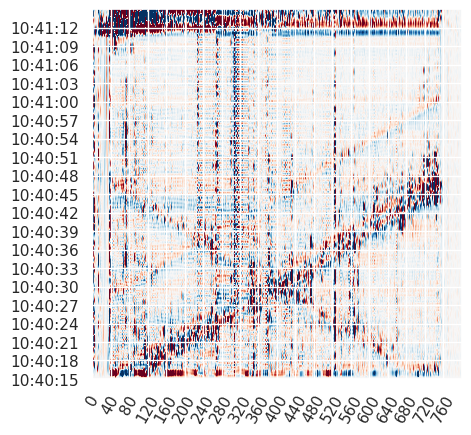

In [4]:
das.reset()
das.lowpass_filter(0.5)
das.decimate(4)
das.heatmap()

In [5]:
pd.Series(das.signal.values.flatten()).unique()

array([ 3.54538277e-15, -4.50591777e-17, -6.48161514e-15, ...,
       -2.99889927e-09, -3.38422513e-09, -5.73040207e-09])

Heatmap with vmin -1.33e-07, vmax 1.33e-07


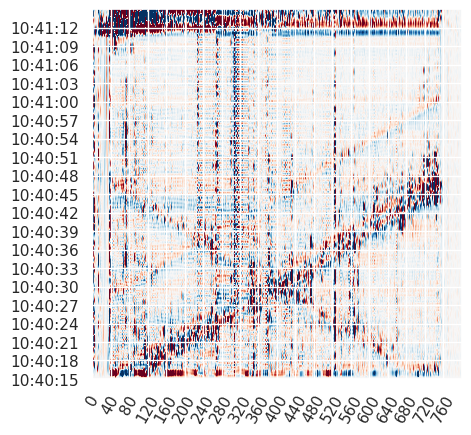

In [7]:
das.heatmap()

In [18]:
das.signal

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
10:40:15,3.545383e-15,-4.505918e-17,-6.481615e-15,-1.138837e-15,4.863453e-15,1.402835e-15,-2.988412e-15,-1.810694e-15,5.634816e-16,1.286581e-15,...,-1.013229e-15,-7.099835e-16,-3.133934e-15,-4.455002e-15,-1.906223e-15,-6.432516e-16,2.757035e-15,3.754874e-15,-5.917376e-16,-1.597613e-15
10:40:15.004000,-1.102904e-15,4.639083e-15,1.009666e-14,-2.974814e-15,-6.937837e-15,9.484694e-16,5.720478e-16,-1.027701e-15,7.494795e-17,1.247885e-15,...,-4.150559e-15,-3.234947e-15,8.070364e-16,2.719161e-15,1.043279e-15,1.079658e-15,-1.510697e-15,-2.591155e-15,1.147682e-15,1.286703e-15
10:40:15.008000,4.144393e-14,2.611251e-14,-2.677270e-14,-3.493479e-14,2.207549e-14,2.871028e-14,-3.396028e-14,-3.268018e-14,4.720983e-15,2.375564e-14,...,-4.029547e-14,-3.271439e-14,-2.710004e-14,-2.815104e-14,-1.457185e-14,-3.831813e-15,1.895583e-14,2.536590e-14,9.934388e-16,-8.636438e-15
10:40:15.012000,1.863424e-13,7.887865e-14,-1.866231e-13,-1.146994e-13,1.165236e-13,9.120115e-14,-1.191685e-13,-1.014569e-13,1.485236e-14,6.854044e-14,...,-1.236426e-13,-1.035938e-13,-8.971980e-14,-9.982327e-14,-5.330331e-14,-1.620837e-14,6.203234e-14,8.618441e-14,-8.413094e-16,-3.427757e-14
10:40:15.016000,4.928887e-13,1.575643e-13,-5.830103e-13,-2.591762e-13,3.504765e-13,2.053303e-13,-2.989119e-13,-2.289736e-13,4.325079e-14,1.535839e-13,...,-2.563422e-13,-2.129745e-13,-2.409982e-13,-2.970966e-13,-1.484661e-13,-4.540614e-14,1.754464e-13,2.448856e-13,-1.778549e-14,-1.080190e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10:41:14.980000,1.131644e-08,-8.148678e-08,-7.871770e-08,5.918506e-08,9.628040e-08,6.361242e-08,1.021299e-08,-2.631804e-08,-3.390893e-08,-4.907921e-09,...,-2.996871e-09,2.309894e-09,5.187212e-09,-1.359663e-09,-2.102176e-09,3.100411e-09,7.738227e-10,-2.995756e-09,-3.384989e-09,-5.659294e-09
10:41:14.984000,1.116477e-08,-8.144254e-08,-7.910823e-08,5.874098e-08,9.691270e-08,6.397805e-08,1.006005e-08,-2.635639e-08,-3.383236e-08,-4.879013e-09,...,-3.045231e-09,2.334419e-09,5.277896e-09,-1.359086e-09,-2.127220e-09,3.079803e-09,7.483949e-10,-2.997247e-09,-3.385522e-09,-5.678211e-09
10:41:14.988000,1.102190e-08,-8.140254e-08,-7.949606e-08,5.831546e-08,9.752871e-08,6.432704e-08,9.910173e-09,-2.639344e-08,-3.375674e-08,-4.850216e-09,...,-3.090273e-09,2.358968e-09,5.364712e-09,-1.359314e-09,-2.152052e-09,3.059634e-09,7.242669e-10,-2.998184e-09,-3.385552e-09,-5.695877e-09
10:41:14.992000,1.087461e-08,-8.136264e-08,-7.991355e-08,5.787009e-08,9.818190e-08,6.469105e-08,9.750489e-09,-2.643245e-08,-3.367566e-08,-4.819132e-09,...,-3.136337e-09,2.385503e-09,5.455506e-09,-1.360168e-09,-2.178725e-09,3.038180e-09,6.991993e-10,-2.998775e-09,-3.385159e-09,-5.713957e-09


Heatmap with vmin -2.97e-08, vmax 2.97e-08


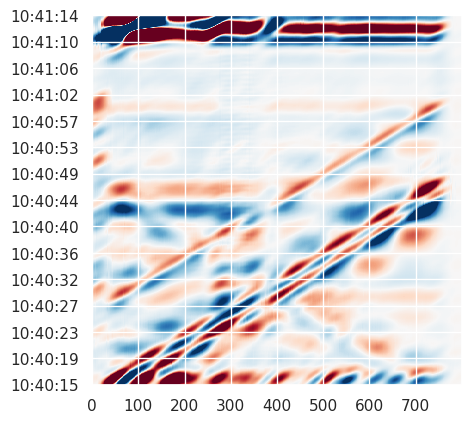

In [6]:
das.convolve(90, 95, 15)
das.heatmap()

In [7]:
import pandas as pd
import numpy as np
from scipy.ndimage import convolve

# # Create a sample DataFrame with pixel intensity values
# data = {'pixel_intensity': [50, 60, 70, 80, 90, 100, 110, 120, 130]}
# df = pd.DataFrame(data)

# # Convert the DataFrame to a NumPy array
# image_array = df['pixel_intensity'].values.reshape(3, 3)  # Adjust the shape according to your image dimensions

# Define the Sobel operator kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel operator in the x and y directions
sobel_x = convolve(das.signal.values, sobel_kernel_x)
sobel_y = convolve(das.signal.values, sobel_kernel_y)

sobel_x_positive = np.maximum(sobel_x, 0)
sobel_y_positive = np.maximum(sobel_y, 0)

# Calculate the magnitude of the gradient
gradient_magnitude = np.sqrt(sobel_x_positive**2 + sobel_y_positive**2)


In [9]:
type(gradient_magnitude)

numpy.ndarray

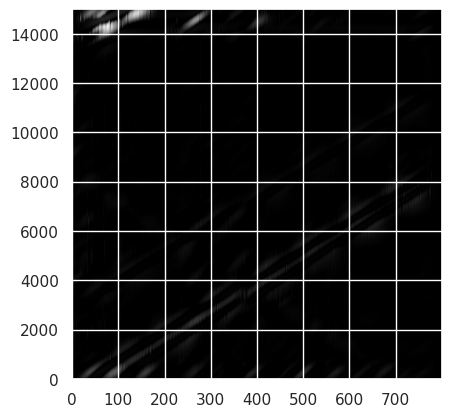

In [8]:
plt.imshow(
    gradient_magnitude,
    cmap='gray',
    origin='lower',
    aspect=gradient_magnitude.shape[1] / gradient_magnitude.shape[0]
);

In [9]:
gradient_magnitude

array([[1.0152323e-09, 1.0026147e-09, 9.5278174e-10, ..., 1.5556517e-10,
        1.3731125e-10, 1.2413359e-10],
       [2.1969961e-09, 2.1762996e-09, 2.0811863e-09, ..., 3.6172534e-10,
        3.2230218e-10, 2.9353550e-10],
       [2.4786895e-09, 2.4682958e-09, 2.3918099e-09, ..., 4.6484028e-10,
        4.2116913e-10, 3.8860445e-10],
       ...,
       [6.1468217e-09, 6.5624861e-09, 7.0834512e-09, ..., 3.8853403e-11,
        5.1790936e-11, 9.7770361e-11],
       [5.4201621e-09, 5.9027334e-09, 6.5346821e-09, ..., 3.4291753e-11,
        4.5993438e-11, 9.8071044e-11],
       [2.4828268e-09, 2.7335558e-09, 3.0676790e-09, ..., 1.4779240e-11,
        3.1031885e-11, 9.5660681e-11]], dtype=float32)

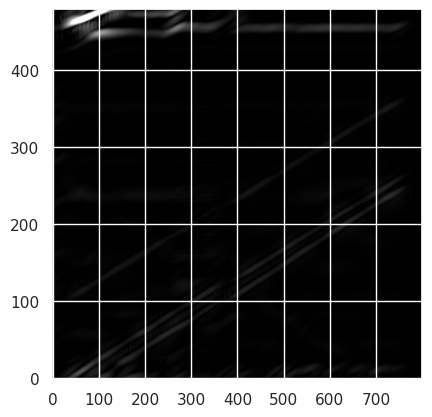

In [10]:
image = gradient_magnitude / np.quantile(gradient_magnitude, 0.5)
# Canny needs input as 8-bit unsigned integer 
scaled_image = cv2.convertScaleAbs(image)

plt.imshow(
    scaled_image,
    cmap='gray',
    origin='lower',
    aspect=gradient_magnitude.shape[1] / gradient_magnitude.shape[0]
);

In [11]:
pd.Series(scaled_image.flatten()).describe()

count    384000.000000
mean          4.560651
std          14.130048
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         255.000000
dtype: float64

In [12]:
result = np.where(scaled_image <= 13, 0, 255)
result = result.astype('uint8')

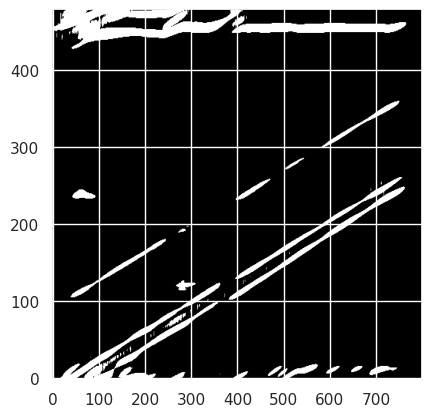

In [13]:
plt.imshow(
    result,
    cmap='gray',
    origin='lower',
    aspect=result.shape[1] / result.shape[0]
);

In [14]:
# Apply HoughLinesP
lines_p = cv2.HoughLinesP(
    result,
    rho=1,  # distance resolution
    theta=np.pi / (4500),  # angle resolution in radian
    threshold=200,
    minLineLength=130,
    maxLineGap=50
)
# (x1, y1), (x2, y2)
# x1, x2 are space (0-799) - vertical
# y1, y2 are time - horizontal
print(len(lines_p))

73


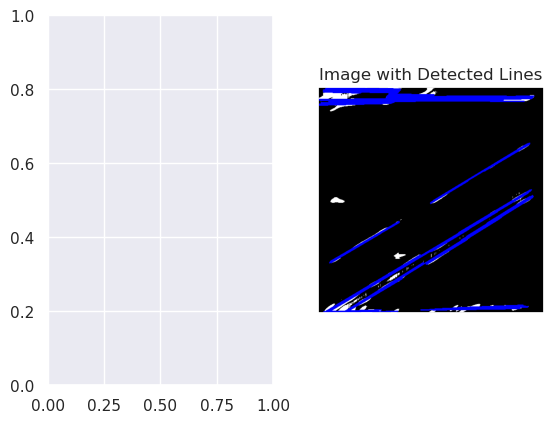

In [15]:
# Visualize the original image
plt.subplot(1, 2, 1)
# plt.imshow(
#     result,
#     cmap='gray',
#     origin='lower',
#     aspect=result.shape[1] / result.shape[0]
# )


# plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Visualize the image with detected lines
image_with_lines = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)  # Convert to color image
if lines_p is not None:
    for line in lines_p:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw lines in red

plt.subplot(1, 2, 2)
plt.imshow(
    image_with_lines,
    cmap='gray',
    origin='lower',
    aspect=image_with_lines.shape[1] / image_with_lines.shape[0]
)
plt.title('Image with Detected Lines'), plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
np.linspace(-100, 100, 1000)

array([-100.        ,  -99.7997998 ,  -99.5995996 ,  -99.3993994 ,
        -99.1991992 ,  -98.998999  ,  -98.7987988 ,  -98.5985986 ,
        -98.3983984 ,  -98.1981982 ,  -97.997998  ,  -97.7977978 ,
        -97.5975976 ,  -97.3973974 ,  -97.1971972 ,  -96.996997  ,
        -96.7967968 ,  -96.5965966 ,  -96.3963964 ,  -96.1961962 ,
        -95.995996  ,  -95.7957958 ,  -95.5955956 ,  -95.3953954 ,
        -95.1951952 ,  -94.99499499,  -94.79479479,  -94.59459459,
        -94.39439439,  -94.19419419,  -93.99399399,  -93.79379379,
        -93.59359359,  -93.39339339,  -93.19319319,  -92.99299299,
        -92.79279279,  -92.59259259,  -92.39239239,  -92.19219219,
        -91.99199199,  -91.79179179,  -91.59159159,  -91.39139139,
        -91.19119119,  -90.99099099,  -90.79079079,  -90.59059059,
        -90.39039039,  -90.19019019,  -89.98998999,  -89.78978979,
        -89.58958959,  -89.38938939,  -89.18918919,  -88.98898899,
        -88.78878879,  -88.58858859,  -88.38838839,  -88.18818

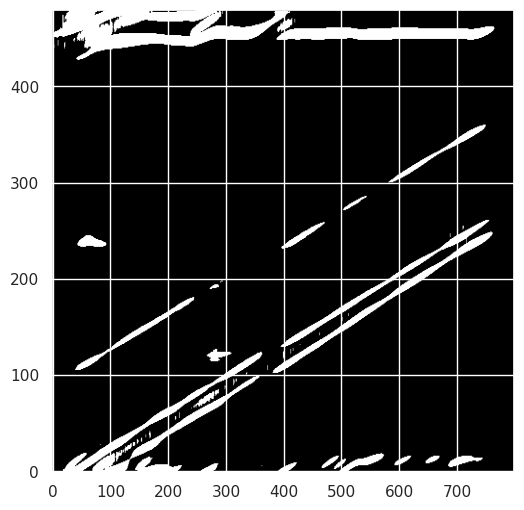

In [17]:
plt.figure(figsize=(6, 6))
# Visualize the image with detected lines
image_with_lines = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)  # Convert to color image
if lines_p is not None:
    for line in lines_p:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 1)  # Draw lines in red

plt.imshow(
    result,
    cmap='gray',
    origin='lower',
    aspect=result.shape[1] / result.shape[0]
)
plt.show();

In [18]:
das.signal.values.shape

(480, 800)

In [19]:
# Calculate additional values for each line
lines_with_info = []
image_height, image_width = image.shape[:2]

for line in lines_p:
    x1, y1, x2, y2 = line[0]

    # Calculate length of the line
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Calculate angle of the line with the horizontal
    angle = np.arctan2(y2 - y1, x2 - x1)

    # Calculate distance from the origin to the line
    distance = np.abs((x2 - x1) * (y1 - 0) - (x1 - 0) * (y2 - y1)) / np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Calculate intersection with left vertical boundary
    left_intersection = (0, int(y1 + (0 - x1) * np.tan(angle)))

    # Calculate intersection with right vertical boundary
    right_intersection = (image_width, int(y1 + (image_width - x1) * np.tan(angle)))


    # Append the additional values to the line
    lines_with_info.append(np.array([
        x1, y1, x2, y2,
        length, angle, distance,
        left_intersection[0], left_intersection[1],
        right_intersection[0], right_intersection[1]]))


In [20]:
lines_df = pd.DataFrame(lines_with_info, columns=['x1', 'y1', 'x2', 'y2', 'length', 'angle', 'distance', 'x1l', 'y1l', 'x2r', 'y2r'])
lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
lines_df = lines_df.loc[lambda df: df['speed'].between(40, 200)]
lines_df = (
    lines_df
    .assign(start_time=lambda df: [das.start + timedelta(seconds = i / 8) for i in df['y1l']])
)
lines_df

/tmp/ipykernel_48204/832736807.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]


,x1,y1,x2,y2,length,angle,distance,x1l,y1l,x2r,y2r,speed,start_time
0,26.0,0.0,756.0,261.0,775.255442,0.343371,8.753244,0.0,-9.0,800.0,276.0,80.551724,2023-09-01 10:40:13.875
4,25.0,0.0,755.0,261.0,775.255442,0.343371,8.416581,0.0,-8.0,800.0,277.0,80.551724,2023-09-01 10:40:14.000
6,32.0,1.0,753.0,259.0,765.770853,0.343639,9.839758,0.0,-10.0,800.0,275.0,80.483721,2023-09-01 10:40:13.750
7,93.0,0.0,762.0,247.0,713.140940,0.353683,32.211024,0.0,-34.0,800.0,261.0,78.004858,2023-09-01 10:40:10.750
8,397.0,233.0,750.0,360.0,375.150636,0.345355,84.845918,0.0,90.0,800.0,377.0,80.050394,2023-09-01 10:40:26.250
9,32.0,0.0,745.0,255.0,757.227839,0.343468,10.776149,0.0,-11.0,800.0,274.0,80.527059,2023-09-01 10:40:13.625
12,383.0,105.0,760.0,245.0,402.155443,0.355569,34.899441,0.0,-37.0,800.0,259.0,77.554286,2023-09-01 10:40:10.375
14,497.0,170.0,751.0,261.0,269.809192,0.344021,7.586843,0.0,-8.0,800.0,278.0,80.386813,2023-09-01 10:40:14.000
15,506.0,154.0,761.0,248.0,271.773803,0.353172,30.518026,0.0,-32.0,800.0,262.0,78.127660,2023-09-01 10:40:11.000
16,398.0,234.0,747.0,360.0,371.048514,0.346468,84.943070,0.0,90.0,800.0,379.0,79.771429,2023-09-01 10:40:26.250


In [21]:
das.signal.shape

(480, 800)

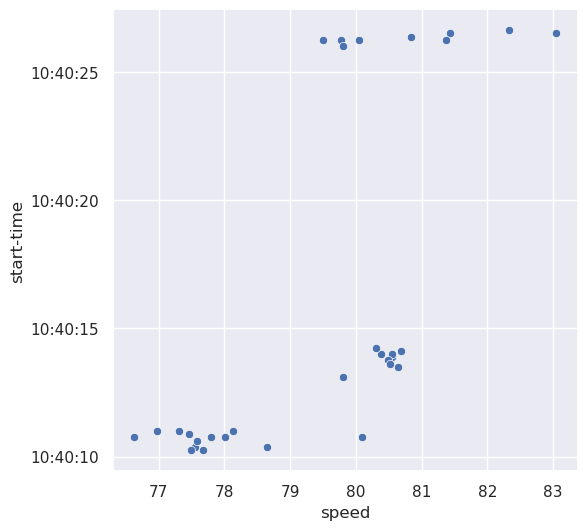

In [22]:
x = lines_df.speed
y = lines_df.start_time

# ideally 3 seconds (8*3 rows)) equal 10 km/h (~0.05 angle) difference
# ideally 2 seconds (8*2 rows)) equal 5 km/h (~0.02 angle) difference
# => 16:5 <=> 3.2:1
# x = x * 3.2


plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y)
plt.xlabel('speed');
plt.ylabel('start-time');

In [24]:
np.sqrt(2 * (2**2))

2.8284271247461903

In [29]:
x.values

array([80.55172414, 80.55172414, 80.48372093, 78.0048583 , 80.0503937 ,
       80.52705882, 77.55428571, 80.38681319, 78.12765957, 79.77142857,
       77.49278351, 79.8       , 77.46206897, 79.49752066, 80.68760331,
       80.84210526, 76.61886792, 80.64      , 77.30526316, 77.67272727,
       80.31219512, 80.08767123, 83.05116279, 79.8       , 82.33411765,
       77.78969072, 81.43448276, 77.58367347, 78.64615385, 76.97943925,
       81.37142857])

In [30]:
cluster = DBSCAN(
    eps=np.sqrt(2*(6**2)),
    min_samples=1,
    metric='euclidean'
)

cluster = cluster.fit(list(zip(x, y)))
cluster = cluster.labels_.copy()
# cluster = [-1 if (i[1] <= 1.64) or (i[1] >= 1.68) else j for i, j in zip(np.squeeze(lines), cluster)]
# cluster = [-1 if (i[1] <= 1.52) or (i[1] >= 1.54) else j for i, j in zip(np.squeeze(lines), cluster)]
cluster = [str(i) for i in cluster]

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
import matplotlib


In [ ]:
locator = matplotlib.dates.AutoDateLocator() 
formatter =  matplotlib.dates.AutoDateFormatter(locator)
formatter.scaled[1/(24*60)] = '%M:%S'
formatter

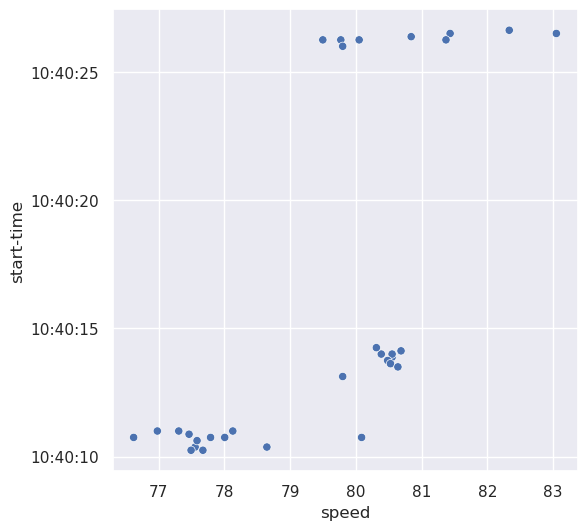

In [27]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, hue=cluster)
plt.legend([],[], frameon=False)
plt.xlabel('speed');
plt.ylabel('start-time');

In [28]:
detect1 =(
    lines_df
    .assign(cluster=cluster)
    .groupby('cluster')
    .apply(
        lambda df: pd.Series([
            np.average(df['speed'], weights=df['length']),
            np.average(df['y1l'], weights=df['length'])
        ], index=['speed_avg', 'start_time_avg'])
    )
    .reset_index()
    .assign(start_time_avg=lambda df: [das.start + timedelta(seconds = i / 8) for i in df['start_time_avg']])
    .sort_values('start_time_avg')
)
detect1


,cluster,speed_avg,start_time_avg
0,"DBSCAN(eps=8.48528137423857, min_samples=1)",79.492525,2023-09-01 10:40:15.281730


In [912]:
detect =(
    lines_df
    .assign(cluster=cluster)
    .groupby('cluster')
    .apply(
        lambda df: pd.Series([
            np.average(df['speed'], weights=df['length']),
            np.average(df['y1l'], weights=df['length'])
        ], index=['speed_avg', 'start_time_avg'])
    )
    .reset_index()
    .assign(start_time_avg=lambda df: [das.start + timedelta(seconds = i / 8) for i in df['start_time_avg']])
    .sort_values('start_time_avg')
)
detect


,cluster,speed_avg,start_time_avg
0,0,101.707521,2023-09-01 16:30:56.047160


# Run all data

In [937]:
from datetime import datetime, timedelta

# Define the start and end time
start_time_str = '20231005 082445'
end_time_str = '20231005 110545'  # 110545

# Convert string to datetime objects
start_time = datetime.strptime(start_time_str, '%Y%m%d %H%M%S')
end_time = datetime.strptime(end_time_str, '%Y%m%d %H%M%S')

# Define the time interval
interval = timedelta(seconds=60)

# Generate a list of time values
time_values = []

current_time = start_time
while current_time <= end_time:
    time_values.append(current_time)
    current_time += interval

# If you want the time values as strings, you can convert them
time_values_str = [time.strftime('%Y%m%d %H%M%S') for time in time_values]


In [938]:
len(time_values_str)

162

In [972]:
final_result = pd.DataFrame()

for time in time_values_str:

    das = dasly.Dasly()
    das.load_data(
        folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
        start=time,
        duration=60
    )
    das.lowpass_filter(0.5)
    das.decimate(4)
    das.convolve(90, 95, 15)

    ## edge detection
    ###########################################################################
    # Define the Sobel operator kernels
    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Apply Sobel operator in the x and y directions
    sobel_x = convolve(das.signal.values, sobel_kernel_x)
    sobel_y = convolve(das.signal.values, sobel_kernel_y)

    sobel_x_positive = np.maximum(sobel_x, 0)
    sobel_y_positive = np.maximum(sobel_y, 0)

    # Calculate the magnitude of the gradient
    gradient_magnitude = np.sqrt(sobel_x_positive**2 + sobel_y_positive**2)

    image = gradient_magnitude / np.quantile(gradient_magnitude, 0.5)
    # Canny needs input as 8-bit unsigned integer 
    scaled_image = cv2.convertScaleAbs(image)


    ## binary
    ###########################################################################
    result = np.where(scaled_image <= 13, 0, 255)
    result = result.astype('uint8')


    ## hough
    ###########################################################################
    lines_p = cv2.HoughLinesP(
        result,
        rho=1,  # distance resolution
        theta=np.pi / (4500),  # angle resolution in radian
        threshold=200,
        minLineLength=130,
        maxLineGap=50
    )
    # Calculate additional values for each line
    lines_with_info = []
    image_height, image_width = image.shape[:2]

    for line in lines_p:
        x1, y1, x2, y2 = line[0]

        # Calculate length of the line
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

        # Calculate angle of the line with the horizontal
        angle = np.arctan2(y2 - y1, x2 - x1)

        # Calculate distance from the origin to the line
        distance = np.abs((x2 - x1) * (y1 - 0) - (x1 - 0) * (y2 - y1)) / np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

        # Calculate intersection with left vertical boundary
        left_intersection = (0, int(y1 + (0 - x1) * np.tan(angle)))

        # Calculate intersection with right vertical boundary
        right_intersection = (image_width, int(y1 + (image_width - x1) * np.tan(angle)))

        # Append the additional values to the line
        lines_with_info.append(np.array([
            x1, y1, x2, y2,
            length, angle, distance,
            left_intersection[0], left_intersection[1],
            right_intersection[0], right_intersection[1]]))

        # data frame
        lines_df = pd.DataFrame(lines_with_info, columns=['x1', 'y1', 'x2', 'y2', 'length', 'angle', 'distance', 'x1l', 'y1l', 'x2r', 'y2r'])
        lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
        lines_df = lines_df.loc[lambda df: df['speed'].between(40, 200)]

        if len(lines_df) > 0:
            # DBSCAN
            ###########################################################################
            x = lines_df.speed
            y = lines_df.y1l


            cluster = DBSCAN(
                eps=np.sqrt(2*(6**2)),
                min_samples=1,
                metric='euclidean'
            )

            cluster = cluster.fit(list(zip(x, y)))
            cluster = cluster.labels_.copy()
            cluster = [str(i) for i in cluster]

            cluster_df = (
                lines_df
                .assign(cluster=cluster)
                .groupby('cluster')
                .apply(
                    lambda df: pd.Series([
                        np.average(df['speed'], weights=df['length']),
                        np.average(df['y1l'], weights=df['length'])
                    ], index=['speed_avg', 'start_time_avg'])
                )
                .reset_index()
                .assign(start_time_avg=lambda df: [das.start + timedelta(seconds = i / 8) for i in df['start_time_avg']])
                .sort_values('start_time_avg')
            )
            final_result = pd.concat([final_result, cluster_df])

Welcome to Dasly!
7 files, from 082444 to 082544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 082544 to 082644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 082644 to 082744
Welcome to Dasly!
7 files, from 082744 to 082844
Welcome to Dasly!
7 files, from 082844 to 082944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 082944 to 083044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083044 to 083144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083144 to 083244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083244 to 083344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083344 to 083444
Welcome to Dasly!
7 files, from 083444 to 083544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083544 to 083644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083644 to 083744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083744 to 083844
Welcome to Dasly!
7 files, from 083844 to 083944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 083944 to 084044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 084044 to 084144
Welcome to Dasly!
7 files, from 084144 to 084244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 084244 to 084344
Welcome to Dasly!
7 files, from 084344 to 084444
Welcome to Dasly!
7 files, from 084444 to 084544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 084544 to 084644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 084644 to 084744
Welcome to Dasly!
7 files, from 084744 to 084844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 084844 to 084944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]


Welcome to Dasly!
7 files, from 084944 to 085044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085044 to 085144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085144 to 085244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085244 to 085344
Welcome to Dasly!
7 files, from 085344 to 085444


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085444 to 085544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085544 to 085644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085644 to 085744
Welcome to Dasly!
7 files, from 085744 to 085844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 085844 to 085944
Welcome to Dasly!
7 files, from 085944 to 090044
Welcome to Dasly!
7 files, from 090044 to 090144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 090144 to 090244
Welcome to Dasly!
7 files, from 090244 to 090344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 090344 to 090444


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 090444 to 090544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 090544 to 090644
Welcome to Dasly!
7 files, from 090644 to 090744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 090744 to 090844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 090844 to 090944
Welcome to Dasly!
7 files, from 090944 to 091044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091044 to 091144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091144 to 091244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091244 to 091344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091344 to 091444


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091444 to 091544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091544 to 091644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091644 to 091744
Welcome to Dasly!
7 files, from 091744 to 091844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 091844 to 091944
Welcome to Dasly!
7 files, from 091944 to 092044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092044 to 092144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092144 to 092244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092244 to 092344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092344 to 092444
Welcome to Dasly!
7 files, from 092444 to 092544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092544 to 092644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092644 to 092744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092744 to 092845
Welcome to Dasly!
7 files, from 092845 to 092944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 092944 to 093044
Welcome to Dasly!
7 files, from 093044 to 093144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093144 to 093244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093244 to 093344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093344 to 093445


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093445 to 093544
Welcome to Dasly!
7 files, from 093544 to 093644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093644 to 093744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093744 to 093844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 093844 to 093944
Welcome to Dasly!
7 files, from 093944 to 094045


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094045 to 094144
Welcome to Dasly!
7 files, from 094144 to 094244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094244 to 094344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094344 to 094444


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094444 to 094544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094544 to 094645
Welcome to Dasly!
7 files, from 094645 to 094745


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094745 to 094844
Welcome to Dasly!
7 files, from 094844 to 094944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 094944 to 095044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095044 to 095144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095144 to 095245


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095245 to 095345


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095345 to 095444
Welcome to Dasly!
7 files, from 095444 to 095544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095544 to 095644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095644 to 095744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095744 to 095845
Welcome to Dasly!
7 files, from 095845 to 095945


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 095945 to 100044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 100044 to 100144
Welcome to Dasly!
7 files, from 100144 to 100244
Welcome to Dasly!
7 files, from 100244 to 100344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 100344 to 100445


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 100445 to 100545
Welcome to Dasly!
7 files, from 100545 to 100644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 100644 to 100744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 100744 to 100844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 100844 to 100944
Welcome to Dasly!
7 files, from 100944 to 101045


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101045 to 101145
Welcome to Dasly!
7 files, from 101145 to 101245


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101245 to 101344
Welcome to Dasly!
7 files, from 101344 to 101444


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101444 to 101544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101544 to 101645


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101645 to 101745


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101745 to 101845


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101845 to 101944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 101944 to 102044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102044 to 102144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102144 to 102245


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102245 to 102345


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102345 to 102445


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102445 to 102544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102544 to 102644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102644 to 102744


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102744 to 102845
Welcome to Dasly!
7 files, from 102845 to 102945


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 102945 to 103045
Welcome to Dasly!
7 files, from 103045 to 103144


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103144 to 103244


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103244 to 103344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103344 to 103445
Welcome to Dasly!
7 files, from 103445 to 103545


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103545 to 103645


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103645 to 103745


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103745 to 103844


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103844 to 103944


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 103944 to 104045


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104045 to 104145


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104145 to 104245


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]


Welcome to Dasly!
7 files, from 104245 to 104345


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104345 to 104444
Welcome to Dasly!
7 files, from 104444 to 104544


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104544 to 104645


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104645 to 104745


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104745 to 104845


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104845 to 104945


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 104945 to 105044


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 105044 to 105144
Welcome to Dasly!
7 files, from 105144 to 105245


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 105245 to 105345
Welcome to Dasly!
7 files, from 105345 to 105445


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 105445 to 105545


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 105545 to 105644


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]


Welcome to Dasly!
7 files, from 105644 to 105744
Welcome to Dasly!
7 files, from 105744 to 105845


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 105845 to 105945
Welcome to Dasly!
7 files, from 105945 to 110045
Welcome to Dasly!
7 files, from 110045 to 110145
Welcome to Dasly!
7 files, from 110145 to 110245


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 110245 to 110344


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

Welcome to Dasly!
7 files, from 110344 to 110445


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]


Welcome to Dasly!
7 files, from 110445 to 110545
Welcome to Dasly!
7 files, from 110545 to 110645


/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero encountered in scalar divide
  lines_df['speed'] = [1 / np.tan(i) * (480 / 60) * 3.6 for i in lines_df['angle']]
/tmp/ipykernel_3921469/1622168050.py:83: RuntimeWarning: divide by zero enc

In [1033]:
a = (
    final_result
    .sort_values('start_time_avg')
    .assign(start = lambda df: df['start_time_avg'] - df['start_time_avg'].min())
    .assign(start_second = lambda df: df['start'].dt.total_seconds())
)
a

,cluster,speed_avg,start_time_avg,start,start_second
0,0,90.271749,2023-10-05 08:26:47.863559,0 days 00:00:00,0.000000
0,0,90.271749,2023-10-05 08:26:47.863559,0 days 00:00:00,0.000000
0,0,90.258865,2023-10-05 08:26:47.901920,0 days 00:00:00.038361,0.038361
0,0,90.258865,2023-10-05 08:26:47.901920,0 days 00:00:00.038361,0.038361
0,0,90.208241,2023-10-05 08:26:47.902059,0 days 00:00:00.038500,0.038500
...,...,...,...,...,...
0,0,81.424961,2023-10-05 11:05:54.543804,0 days 02:39:06.680245,9546.680245
0,0,81.424961,2023-10-05 11:05:54.543804,0 days 02:39:06.680245,9546.680245
0,0,81.424961,2023-10-05 11:05:54.543804,0 days 02:39:06.680245,9546.680245
0,0,81.448135,2023-10-05 11:05:54.553873,0 days 02:39:06.690314,9546.690314


In [1054]:
cluster = DBSCAN(
    eps=1.5,
    min_samples=1,
    metric='euclidean'
)

In [1055]:
cluster = cluster.fit(a['start_second'].values.reshape(-1, 1))

In [1056]:
final_final = (
    a
    .assign(car=cluster.labels_)
    .groupby('car')
    .agg({'speed_avg':'mean', 'start_time_avg':'mean'})
)
final_final

,speed_avg,start_time_avg
car,,
0,90.186631,2023-10-05 08:26:47.930609408
1,75.667346,2023-10-05 08:27:16.580804096
2,85.666795,2023-10-05 08:32:32.205036800
3,71.677052,2023-10-05 08:34:00.518888704
4,86.933333,2023-10-05 08:34:02.375000320
...,...,...
166,79.019310,2023-10-05 11:04:19.992693248
167,85.458264,2023-10-05 11:04:23.640203520
168,82.117053,2023-10-05 11:04:48.697424384


In [1057]:
logs = pd.read_excel('vehicle-logs.xlsx')
log_right = (
    logs
    .loc[lambda df: df['Direction map'] == 'Åstfjordbrua -> Trondheim']
)
print(log_right.shape)
log_right.head()

(171, 6)


,Time,Type,Trailer,Direction camera,Direction map,Note
0,2023-10-05 10:24:44.210,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
2,2023-10-05 10:27:18.030,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
5,2023-10-05 10:27:51.620,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
12,2023-10-05 10:30:37.050,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
13,2023-10-05 10:30:39.030,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN


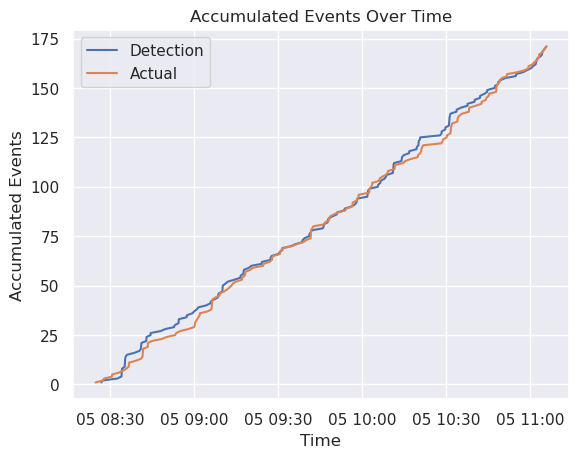

In [1058]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# # Sample data for lists A and B
# list_A = final_result['start']
# list_B = logs['Time']

# # Convert strings to datetime objects
# time_format = '%Y%m%d %H%M%S'
# time_A = [datetime.strptime(time_str, time_format) for time_str in list_A]
# time_B = [datetime.strptime(time_str, time_format) for time_str in list_B]

time_A = final_final['start_time_avg']
time_B = log_right['Time']
time_B = [i - timedelta(hours=2) for i in time_B]


# Sort the time and create corresponding event count arrays
sorted_time_A, count_A = zip(*sorted(zip(time_A, range(1, len(time_A)+1))))
sorted_time_B, count_B = zip(*sorted(zip(time_B, range(1, len(time_B)+1))))

# Plotting
plt.plot(sorted_time_A, count_A, label='Detection')
plt.plot(sorted_time_B, count_B, label='Actual')

# Formatting plot
plt.xlabel('Time')
plt.ylabel('Accumulated Events')
plt.title('Accumulated Events Over Time')
plt.legend()
plt.grid(True)
plt.show()
